In [1163]:
import requests
import inspect
import pytz
import pandas as pd
import numpy as np

from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from time import ctime   # ctime converts epoch time (ex:1661522400) to string form (Thu Aug 25 16:00:00 2022)
from time import gmtime   # Convert a time expressed in seconds since the epoch to a struct_time in UTC in which the dst flag is always zero.
from time import localtime # Like gmtime() but converts to local time.

from datetime import datetime, timedelta
today = datetime.now()
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 20

import time
start = time.time()




### 2 fichiers créés par node-red et mis à jour toutes les heures avec openweather node dans onglet Temp/Hum

#### json_file ="C:/Users/jean/OneDrive/Bureau/5days.txt"

#### json_file ="Y:/Documents/5days.txt"

#### le fichier contient une liste de 40 lignes :
- une ligne = 3 heures, 
- 8 lignes par jour 
- sur 5 jours


In [1164]:
try:
    json_file = "Y:/Documents/5days.txt"  # pc cuisine
    current = pd.read_json(json_file)
except:
    json_file = "W:/Documents/5days.txt"  # pc chambre
    current = pd.read_json(json_file)
print(json_file)

Y:/Documents/5days.txt


In [1165]:
#current['dates'] = [datetime.fromtimestamp(current.dt[k], pytz.timezone('Europe/Paris')) for k in range(40)]
current['dates'] = [datetime.fromtimestamp(current.dt[k]) for k in range(40)]
current['h_date'] = [datetime.fromtimestamp(current.dt[k]).strftime('%d/%m/%Y %H:%M:%S') for k in range(40)]
current['h_time'] = [datetime.fromtimestamp(current.dt[k]).strftime('%H') for k in range(40)]
current.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        40 non-null     float64       
 1   feels_like  40 non-null     float64       
 2   temp_min    40 non-null     float64       
 3   temp_max    40 non-null     float64       
 4   pressure    40 non-null     int64         
 5   sea_level   40 non-null     int64         
 6   grnd_level  40 non-null     int64         
 7   humidity    40 non-null     int64         
 8   temp_kf     40 non-null     float64       
 9   dt          40 non-null     int64         
 10  dates       40 non-null     datetime64[ns]
 11  h_date      40 non-null     object        
 12  h_time      40 non-null     object        
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 4.2+ KB


In [1166]:
debut = current.head(1).h_date[0]
fin = current.tail(1).h_date[39]
debut, fin

('11/06/2025 11:00:00', '16/06/2025 08:00:00')

<Axes: >

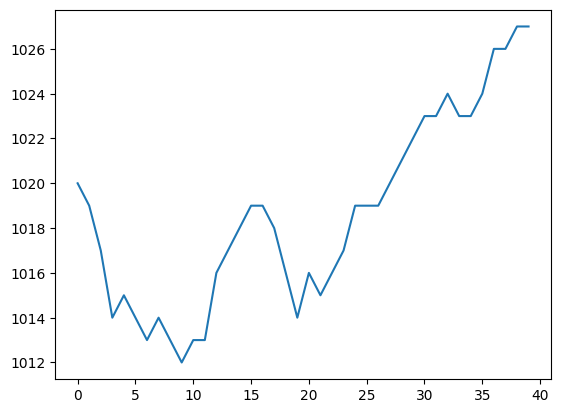

In [1167]:
current.pressure.plot()


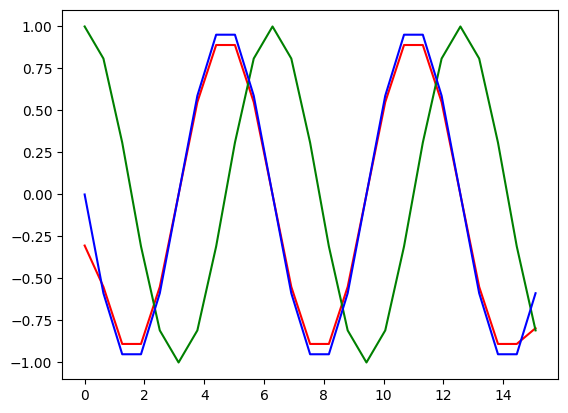

In [1168]:
pi = np.pi
x = np.arange(0,5*pi,0.2*pi)
y = np.cos(x) 
# derivative dy/dx = -sin(x)
der = np.gradient(y,x)
plt.plot(x, der, 'r', x, y, 'g', x, -np.sin(x),'b')
plt.show()

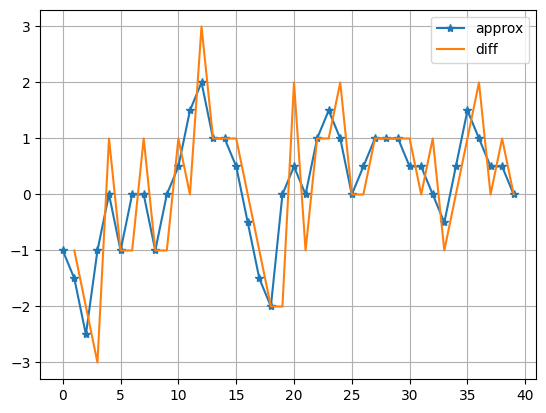

In [1169]:
# derivative of pressure
dy = current.pressure#.diff()
#dy.plot()
# we sample a sin(x) function
dx = current.index.step
x = np.arange(0,40)
#current.pressure.diff().plot(label='diff')
# we calculate the derivative, with np.gradient
plt.plot(x,np.gradient(dy, dx), '-*', label='approx')
#plt.plot()
dy.diff().plot(x=x,label='diff')
plt.legend()
plt.grid()


<Axes: >

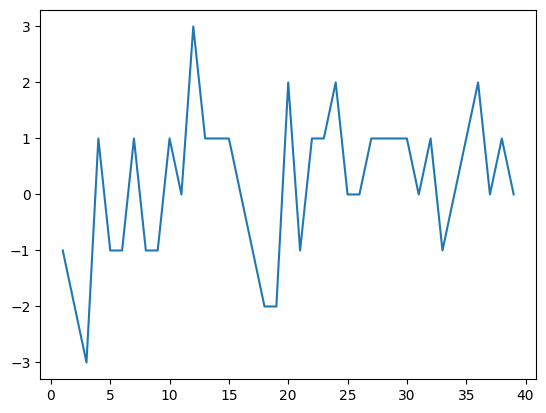

In [1170]:
dy.diff().plot()

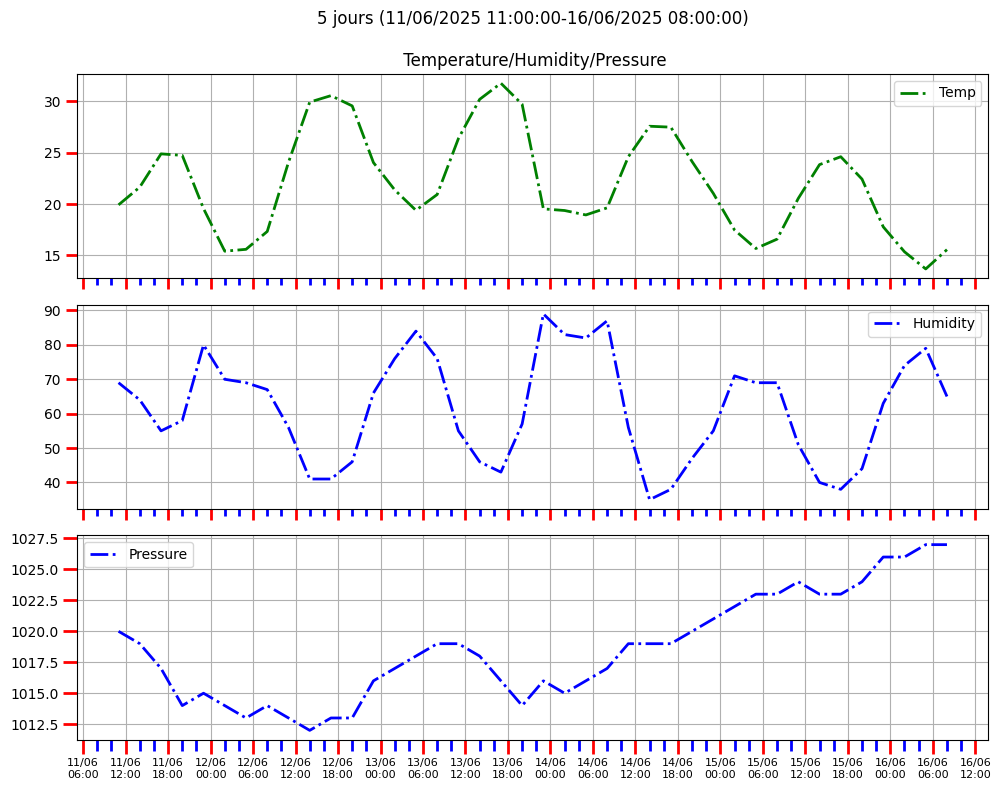

In [1171]:
#fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True)
# the size of A4 paper
fig.set_size_inches(10, 8)

ax1.tick_params('x', labelsize=8)
ax2.tick_params('x', labelsize=8)
ax3.tick_params('x', labelsize=8)

# format affichage dates sur axe des x
formatter = DateFormatter('%d/%m\n%H:%M')
#ax1.xaxis.set_major_formatter(formatter)
#ax2.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_formatter(formatter)

# nombre de ticks sur axe des x
major_ticks = 1/4                    # toutes les 6 heures pour 1/4, 12h pour 1/2
minor_ticks = major_ticks/3          # facteur div = 4  -> minor ticks toutes les 3 heures

# temperature
ax1.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax1.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # ???? pas d'affichage des minor ticks ???
# format des ticks
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=8, color='r')
ax1.tick_params(which='minor', length=5, color='b')
#plot
ax1.plot(current.dates,current.temp,'g-.',label='Temp',linewidth=2)
#plt.plot(current.dates,current.temp_max,'r-.',label='Max',linewidth=2)
#plt.plot(current.dates,current.temp_min,'b-.',label='Min',linewidth=2)

# humidity
ax2.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax2.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  
# format des ticks
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=8, color='r')
ax2.tick_params(which='minor', length=5, color='b')
ax2.plot(current.dates,current.humidity,'b-.',label='Humidity',linewidth=2)

# pression
ax3.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax3.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  
# format des ticks
ax3.tick_params(which='both', width=2)
ax3.tick_params(which='major', length=10, color='r')
ax3.tick_params(which='minor', length=8, color='b')
ax3.plot(current.dates,current.pressure,'b-.',label='Pressure',linewidth=2)

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
ax3.grid()
ax3.legend()

ax1.set_title(f'5 jours ({debut}-{fin})\n\n Temperature/Humidity/Pressure')
#ax2.set_title(f'Humidity')
fig.tight_layout()


# tendances

## temp * pression / humidity
- plus de pression, moins d'humidité = meilleure tendance

In [1172]:
try:
    img = plt.imread(r"Screenshot 2024-06-04 095520.png")    # don't work with svg files
    fig, ax = plt.subplots()
    x = range(300)
    ax.imshow(img, extent=[0, 400, 0, 300])
except:
    pass

Le point de rosée est une donnée thermodynamique caractérisant l'humidité dans un gaz. 
Le point de rosée de l'air est la température à laquelle la pression partielle de vapeur 
d'eau est égale à sa pression de vapeur saturante. Il s'agit donc de la température à 
laquelle il faut refroidir un volume d'air, à pression et humidité absolue constantes, 
pour qu'il devienne saturé donc il y a condensation.

La dépression du point de rosée est la différence entre la température et le point de rosée : (T-Tr)
 à un niveau de pression donnée de l'atmosphère terrestre

 https://fr.wikipedia.org/wiki/Point_de_ros%C3%A9e


La dépression du point de rosée est la différence entre la température et le point de rosée (T-Tr) à un niveau de pression donnée de l'atmosphère terrestre7. Plus cette valeur est petite, plus l’humidité relative à cette altitude est grande et plus la présence de nuages est probable. Ainsi, une dépression de plus de 5 °C est en général associée avec l'absence de couche nuageuse et une valeur près de 0 °C est synonyme d'une couverture complète. La variation dans la troposphère de la dépression du point de rosée, analysée sur un diagramme thermodynamique comme un téphigramme, permet de connaître la hauteur, l'épaisseur et l'étendue des couches nuageuses sur une région.

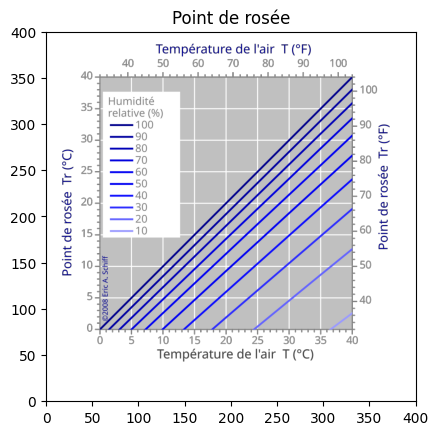

In [1173]:
try:
    img = plt.imread(r"Dewpoint-RH-fr.svg.png")    # don't work with svg files
    fig, ax = plt.subplots()
    x = range(300)
    ax.imshow(img, extent=[0, 400, 0, 400])
    plt.title('Point de rosée')
except:
    pass

# si on a hum=80% à la temp=10°C, point de rosée = 7°C, depression = 10-7 = 3 < 5 (nuages)
# si on a hum=70% à la temp=10°C, point de rosée = 5°C, depression = 10-5 = 5 (clair)

In [1174]:
import numpy as np
a, b = 17.27, 237.7

def alpha(T,phi):
    '''
    0 < T < 60
    0.01 < phi < 1
    '''
    return a*T/(b+T) + np.log(phi)

def dewpoint(T, phi): # phi : humidité relative
    f = alpha(T,phi)
    Tr = b*f/(a-f)
    return (T,Tr,T-Tr) #round(Tr,2), round(T-Tr,2)   # dewpoint, depression


In [1175]:
dewpoint(17,.92)

(17, np.float64(15.689111824765133), np.float64(1.310888175234867))

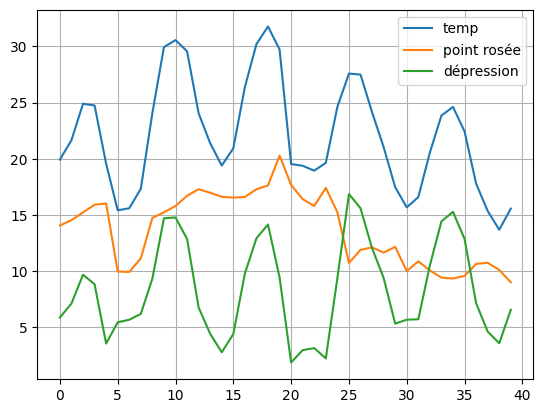

In [1176]:
x = np.arange(40)
x_temp = current.temp
x_hum = current.humidity/100

rosee = dewpoint(x_temp,x_hum)
plt.plot(x,x_temp,label='temp')
plt.plot(x,rosee[1],label='point rosée')
plt.plot(x,rosee[2],label='dépression')
plt.grid()
plt.legend()


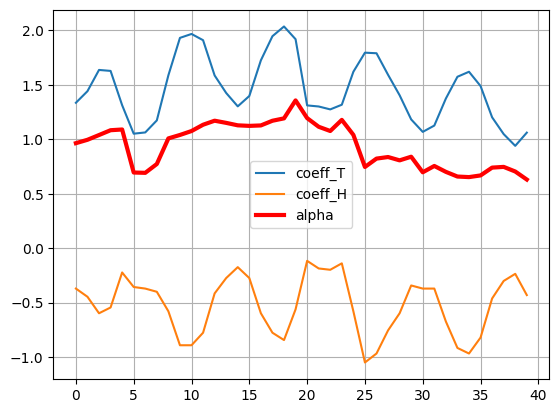

In [1177]:
# alpha(temp,hum)
y_temp = a*x_temp/(b+x_temp)
y_hum = np.log(x_hum)
plt.plot(x,y_temp,label='coeff_T')
plt.plot(x,y_hum,label='coeff_H')  # valeurs négatives
f = y_temp+y_hum  # alpha() = y_temp + y_hum
plt.plot(x,f,label='alpha',lw=3,c='red')
plt.grid()
plt.legend()


(237.7, 17.27)

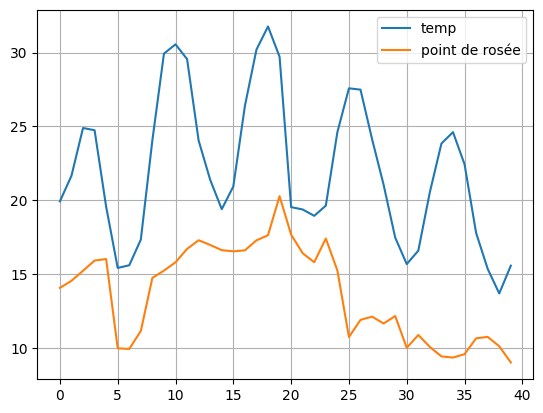

In [1178]:
# point de rosée
plt.plot(x,x_temp,label='temp')
plt.plot(x,b*f/(a-f),label='point de rosée')
plt.grid()
plt.legend()
b,a


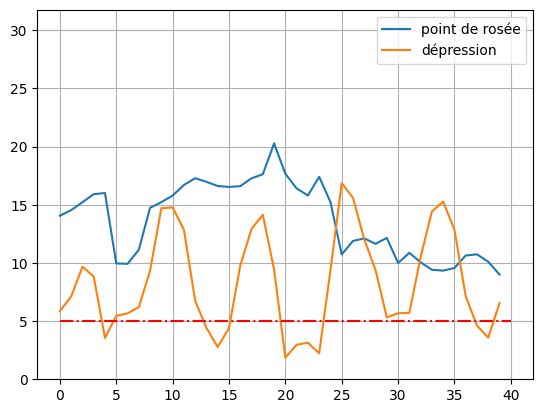

In [1179]:
plt.plot(x,b*f/(a-f),label='point de rosée')
plt.plot(x,x_temp - b*f/(a-f),label='dépression')
plt.plot((0,40),(5,5),'r-.')  # si depression < 5, risuqe de nuages et pluie
plt.grid()
plt.ylim(0,max(x_temp))
plt.legend()

In [1180]:
# alpha
f = y_temp+y_hum
f, alpha(x_temp,x_hum)


(0     0.964308
 1     0.995377
 2     1.039127
 3     1.083301
 4     1.089930
         ...   
 35    0.668145
 36    0.739861
 37    0.746492
 38    0.704104
 39    0.630266
 Length: 40, dtype: float64,
 0     0.964308
 1     0.995377
 2     1.039127
 3     1.083301
 4     1.089930
         ...   
 35    0.668145
 36    0.739861
 37    0.746492
 38    0.704104
 39    0.630266
 Length: 40, dtype: float64)

In [1181]:
(x,y_hum)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 0    -0.371064
 1    -0.446287
 2    -0.597837
 3    -0.544727
 4    -0.223144
         ...   
 35   -0.820981
 36   -0.462035
 37   -0.301105
 38   -0.235722
 39   -0.430783
 Name: humidity, Length: 40, dtype: float64)

In [1182]:
dewpoint(current.temp[0],current.humidity[0]/100)

(np.float64(19.92),
 np.float64(14.057419963297704),
 np.float64(5.8625800367022975))

In [1183]:
dewpt = dewpoint(current.temp ,current.humidity/100) 
dewpt[1] # point de rosée

0     14.057420
1     14.538034
2     15.217938
3     15.908168
4     16.012061
        ...    
35     9.566277
36    10.639054
37    10.738713
38    10.103020
39     9.003400
Length: 40, dtype: float64

In [1184]:
dewpt[2]   # dépression

0      5.862580
1      7.111966
2      9.672062
3      8.831832
4      3.547939
        ...    
35    12.863723
36     7.140946
37     4.611287
38     3.576980
39     6.556600
Length: 40, dtype: float64

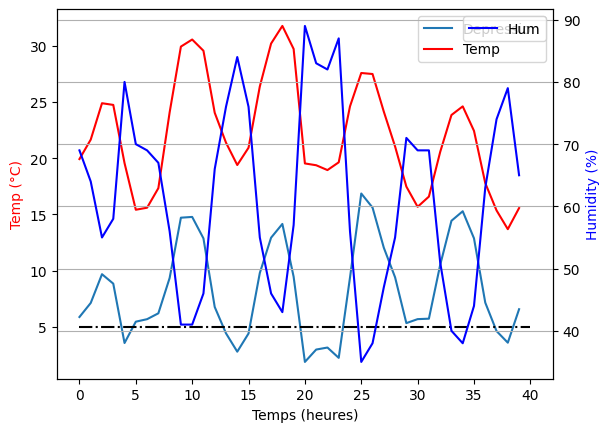

In [1185]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(dewpt[2],label='Depression')
ax1.plot(current.temp,'r',label='Temp')
ax2.plot(current.humidity,'b',label='Hum')
ax1.plot((0,40),(5,5),'k-.')  # black
#plt.ylim(min(dewpt[2])-2,max(current.temp)+2)
ax1.set_xlabel('Temps (heures)')
ax1.set_ylabel('Temp (°C)', color='r')
ax2.set_ylabel('Humidity (%)', color='b')
ax1.legend()
ax2.legend()
plt.grid()
plt.show()


In [1186]:
current.temp.head(),current.h_time.head()

(0    19.92
 1    21.65
 2    24.89
 3    24.74
 4    19.56
 Name: temp, dtype: float64,
 0    11
 1    14
 2    17
 3    20
 4    23
 Name: h_time, dtype: object)

In [1187]:
current['dew_point'] = dewpt[1]
current[['h_time','temp','dew_point']]

,h_time,temp,dew_point
0,11,19.92,14.057420
1,14,21.65,14.538034
2,17,24.89,15.217938
3,20,24.74,15.908168
4,23,19.56,16.012061
...,...,...,...
35,20,22.43,9.566277
36,23,17.78,10.639054
37,02,15.35,10.738713
38,05,13.68,10.103020


In [1188]:
current.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        40 non-null     float64       
 1   feels_like  40 non-null     float64       
 2   temp_min    40 non-null     float64       
 3   temp_max    40 non-null     float64       
 4   pressure    40 non-null     int64         
 5   sea_level   40 non-null     int64         
 6   grnd_level  40 non-null     int64         
 7   humidity    40 non-null     int64         
 8   temp_kf     40 non-null     float64       
 9   dt          40 non-null     int64         
 10  dates       40 non-null     datetime64[ns]
 11  h_date      40 non-null     object        
 12  h_time      40 non-null     object        
 13  dew_point   40 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 4.5+ KB


In [1189]:
current.dates

0    2025-06-11 11:00:00
1    2025-06-11 14:00:00
2    2025-06-11 17:00:00
3    2025-06-11 20:00:00
4    2025-06-11 23:00:00
             ...        
35   2025-06-15 20:00:00
36   2025-06-15 23:00:00
37   2025-06-16 02:00:00
38   2025-06-16 05:00:00
39   2025-06-16 08:00:00
Name: dates, Length: 40, dtype: datetime64[ns]

In [1190]:
formatter = DateFormatter('%d/%m\n%H:%M')
formatter

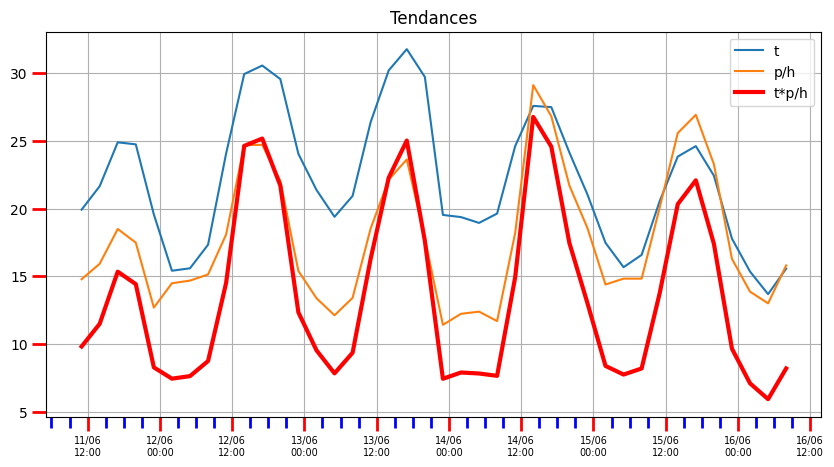

In [1191]:
result1=current.temp  #*current.humidity*current.pressure
result2=(current.pressure)/(current.humidity*10)  #p/h est normalisé, on ramène le rapport autour de 1
result3=(current.temp)*result2

fig, ax = plt.subplots()

# nombre de ticks sur axe des x
major_ticks = 1/2                   # toutes les 6 heures pour 1/4, 12h pour 1/2, 3 heures pour 1/8
minor_ticks = major_ticks/4          # denominateur n = n minor ticks 


# format grid
fig.set_size_inches(10, 5)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
ax.tick_params('x', labelsize=7)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10, color='r')
ax.tick_params(which='minor', length=8, color='b')

# plot
plt.plot(current.dates, result1,label='t')
plt.plot(current.dates, result2*10,label='p/h')
plt.plot(current.dates, result3/3,label='t*p/h',lw=3,c='red')
plt.legend()
plt.title('Tendances')
plt.grid()

<Axes: >

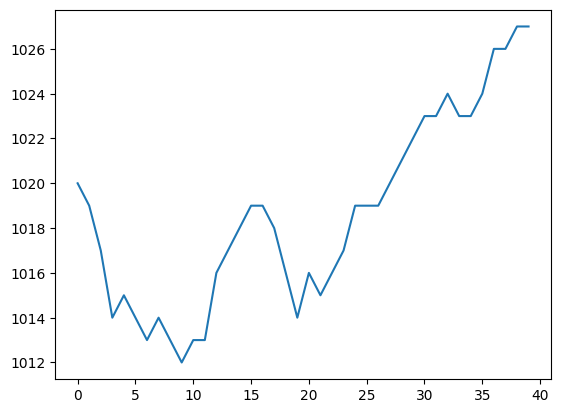

In [1192]:
current.pressure.plot()

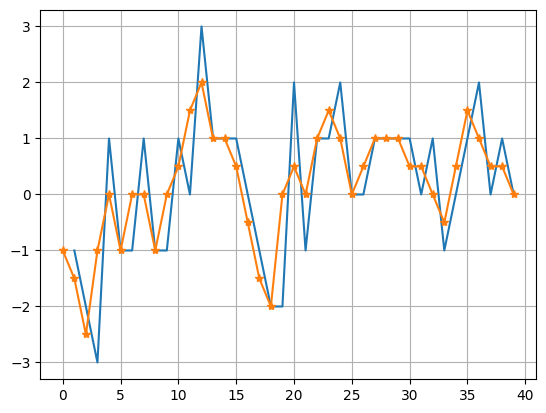

In [1193]:
dy.diff().plot()
plt.plot(x,np.gradient(dy, dx), '-*', label='approx')
plt.grid()

In [1194]:
len(dy)

40

In [1195]:
current.dates

0    2025-06-11 11:00:00
1    2025-06-11 14:00:00
2    2025-06-11 17:00:00
3    2025-06-11 20:00:00
4    2025-06-11 23:00:00
             ...        
35   2025-06-15 20:00:00
36   2025-06-15 23:00:00
37   2025-06-16 02:00:00
38   2025-06-16 05:00:00
39   2025-06-16 08:00:00
Name: dates, Length: 40, dtype: datetime64[ns]

In [1196]:
current.h_date

0     11/06/2025 11:00:00
1     11/06/2025 14:00:00
2     11/06/2025 17:00:00
3     11/06/2025 20:00:00
4     11/06/2025 23:00:00
             ...         
35    15/06/2025 20:00:00
36    15/06/2025 23:00:00
37    16/06/2025 02:00:00
38    16/06/2025 05:00:00
39    16/06/2025 08:00:00
Name: h_date, Length: 40, dtype: object

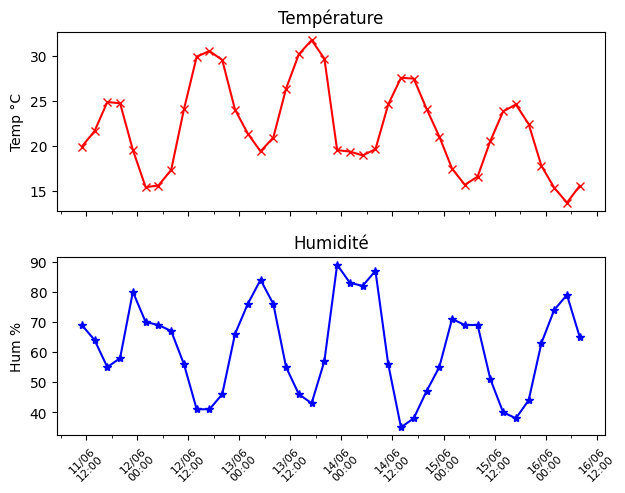

In [1197]:
formatter = DateFormatter('%d/%m\n%H:%M')
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,)
temp = current.temp 
#temp.plot(grid=True, ax=ax1)
ax1.title.set_text('Température')
ax1.set_ylabel('Temp °C')
ax2.title.set_text('Humidité')
plt.tight_layout()
#current.humidity.plot(grid=True, ax=ax2)
ax2.set_ylabel('Hum %')
# plot
ax1.plot(current.dates, temp,'x-',label='temp',color='r')
ax2.plot(current.dates, current.humidity,'*-',label='%hum',color='blue')

#ax2.set(xticks=x, xticklabels=current.dates)
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(MultipleLocator(1/2))  
ax2.xaxis.set_minor_locator(MultipleLocator(1/4))

#ax2.set(xticks=x, xticklabels=current.dates)
ax2.tick_params('x', labelsize=8, rotation=45)

In [1198]:

handles, labels = ax1.get_legend_handles_labels()
handles, labels 

([<matplotlib.lines.Line2D at 0x1e7ac98afd0>], ['temp'])

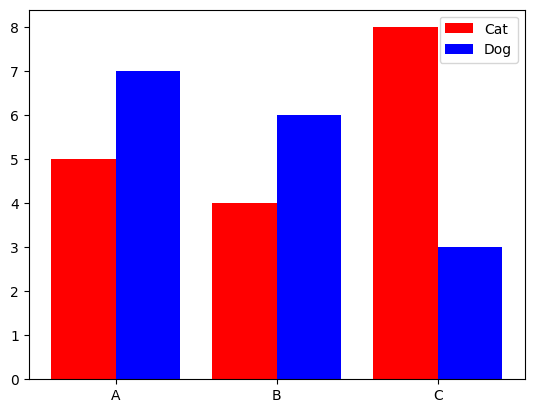

In [1199]:
xticks = ['A','B','C']
Scores = np.array([[5,7],[4,6],[8,3]])
colors = ['red','blue']
names = ["Cat", "Dog"]

fig, ax = plt.subplots()

x = np.arange(len(Scores))
ax.bar(x-0.2, Scores[:,0], color=colors[0], width=0.4, label=names[0])
ax.bar(x+0.2, Scores[:,1], color=colors[1], width=0.4, label=names[1])
ax.set(xticks=x, xticklabels=xticks)
ax.legend()
plt.show()

In [1200]:
datetime.now().strftime('%d/%m/%Y %H:%M:%S')

'11/06/2025 10:31:54'

In [1201]:
end = time.time()
print(end - start)

19.133989095687866


In [1202]:
threshold = 4

# Tendances Météo sur 5 jours

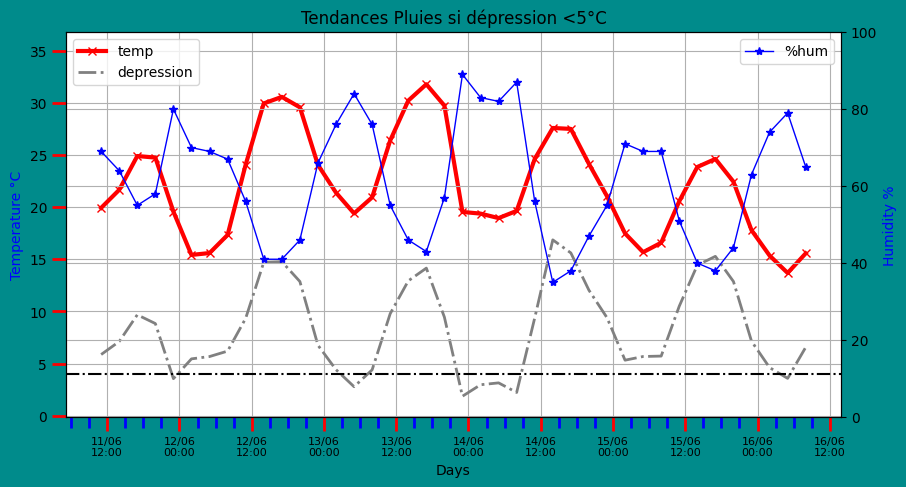

In [1203]:
# point de rosée
current['dewpoint']=dewpt[1]
point_rosee = dewpt[1]
# calcul de la dépression
depression = current.temp-point_rosee
current['depression']=depression
fig, ax1 = plt.subplots(facecolor='darkcyan')
ax2 = ax1.twinx()
ax1.set_xlabel('Days')
ax1.set_ylabel('Temperature °C', color='b')
ax2.set_ylabel('Humidity %', color='b')
# format grid
fig.set_size_inches(10, 5)
# graduations axeX
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax1.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
ax1.tick_params('x', labelsize=8)  # size of x_axis labels
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=10, color='r')
ax1.tick_params(which='minor', length=8, color='b')

# plot
ax1.plot(current.dates, temp,'x-',label='temp',color='red',lw=3)
ax2.plot(current.dates, current.humidity,'*-',label='%hum',color='blue',lw=1)
#ax1.plot(current.dates, point_rosee,label='point de rosée')#,lw=3,c='red')
# tendances pluie
#lbl = 'depr<5+ "pluie" if depression[0]<5 else ""
ax1.plot(current.dates, depression,'-.',label="depression",lw=2,c='grey')
#ax1.plot(current.dates, depression+dy.diff(),'-.',label="depression+diffpressure",lw=2,c='blue')
#ax1.plot((current.dates[0],current.dates[39]),(5,5),'-.',color='black') 
ax1.axhline(threshold, color='black', linestyle='-.')#, alpha=0.5)

# https://stackoverflow.com/questions/28095852/set-ylim-on-subplot-secondary-y-axis
ax1.set_ylim(min(depression)-2,max(current.temp)+5)
ax2.set_ylim(0, 100)
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.title('Tendances Pluies si dépression <5°C')
ax1.grid()
ax2.grid()

In [1204]:
current['h_date']

0     11/06/2025 11:00:00
1     11/06/2025 14:00:00
2     11/06/2025 17:00:00
3     11/06/2025 20:00:00
4     11/06/2025 23:00:00
             ...         
35    15/06/2025 20:00:00
36    15/06/2025 23:00:00
37    16/06/2025 02:00:00
38    16/06/2025 05:00:00
39    16/06/2025 08:00:00
Name: h_date, Length: 40, dtype: object

In [1205]:
current['d'] = current['h_date'].apply(lambda x: x[:2]+'\n'+x[11:13])
current['d'] 

0     11\n11
1     11\n14
2     11\n17
3     11\n20
4     11\n23
       ...  
35    15\n20
36    15\n23
37    16\n02
38    16\n05
39    16\n08
Name: d, Length: 40, dtype: object

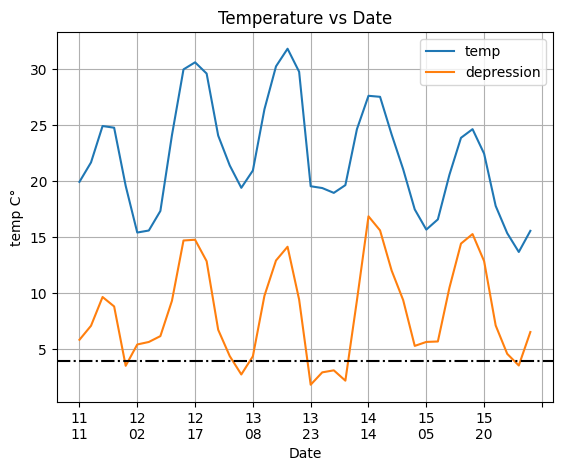

In [1206]:
current[['d','temp','depression']].plot(grid=True, x='d')
# Add labels and title
plt.title('Temperature vs Date')
plt.xlabel('Date')
plt.ylabel('temp C°')
#plt.plot((0,40),(5,5),'-.',c='red',label='seuil 5°C')
plt.axhline(threshold, color='black', linestyle='-.')#, alpha=0.5)
plt.legend()
plt.show()

<Axes: >

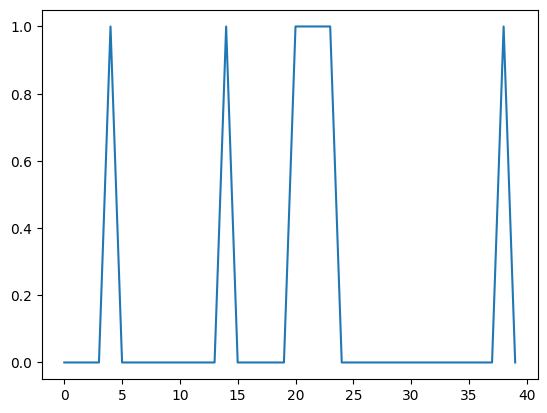

In [1207]:


current['tendances']=current['depression'].apply(lambda x: 'pluie' if x<threshold else 'beau temps')

trends = np.multiply(current['tendances']=='pluie',1) #== True
trends.plot()


<Axes: >

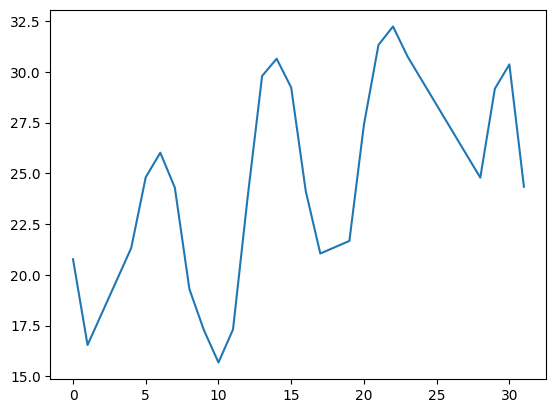

In [1208]:
bt.temp.plot()

In [1209]:
len(current['temp']), len(current['tendances']),len(trends)

(40, 40, 40)

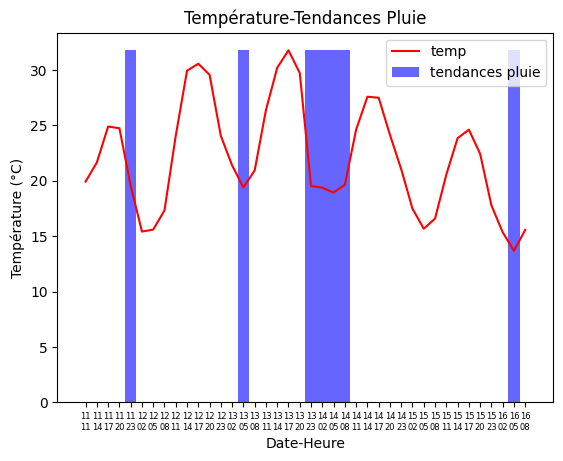

In [1210]:
d= current['d']
max_ = max(current['temp'])
min_ = min(current['temp'])
delt= max_-min_
plt.bar(d,trends*max_,label='tendances pluie',alpha=0.6,width=1,color='blue')
plt.plot(current['temp'],label='temp',c='red')
plt.xticks(fontsize = 6) 
#plt.plot(d,trends)
plt.title('Température-Tendances Pluie')
plt.xlabel('Date-Heure')  
plt.ylabel('Température (°C)')
plt.legend()
plt.show()         

In [1211]:
bt= current.tendances == 'beau temps'
bt

0      True
1      True
2      True
3      True
4     False
      ...  
35     True
36     True
37     True
38    False
39     True
Name: tendances, Length: 40, dtype: bool

In [1212]:
current[['h_date','tendances']]

,h_date,tendances
0,11/06/2025 11:00:00,beau temps
1,11/06/2025 14:00:00,beau temps
2,11/06/2025 17:00:00,beau temps
3,11/06/2025 20:00:00,beau temps
4,11/06/2025 23:00:00,pluie
...,...,...
35,15/06/2025 20:00:00,beau temps
36,15/06/2025 23:00:00,beau temps
37,16/06/2025 02:00:00,beau temps
38,16/06/2025 05:00:00,pluie


In [1213]:
# heure beau temps
bt = current[current.tendances == 'beau temps'][['h_date','temp']]
bt

,h_date,temp
0,11/06/2025 11:00:00,19.92
1,11/06/2025 14:00:00,21.65
2,11/06/2025 17:00:00,24.89
3,11/06/2025 20:00:00,24.74
5,12/06/2025 02:00:00,15.41
...,...,...
34,15/06/2025 17:00:00,24.61
35,15/06/2025 20:00:00,22.43
36,15/06/2025 23:00:00,17.78
37,16/06/2025 02:00:00,15.35


In [1214]:

def format_date_heure(x):
    global memo
    jour = x[:2]
    heure = x[11:13]
    if jour == memo:
        jour = ''
    memo = x[:2]
    return jour+'\n'+heure


In [1215]:
memo = ''
d2 = bt['h_date'].apply(lambda x: format_date_heure(x))  #x[:2]+'\n'+x[11:13])
#d2

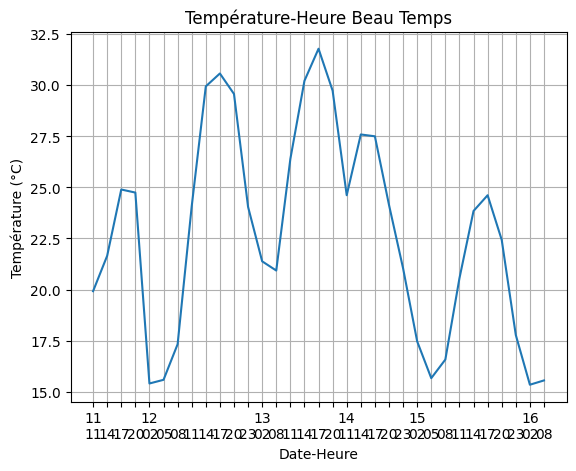

In [1216]:
# format date/heure
memo = ''
d = bt['h_date'].apply(lambda x: x[:2]+'\n'+x[11:13])
plt.plot(d,bt.temp)
#plt.plot(d,trends)
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.title('Température-Heure Beau Temps')
plt.xlabel('Date-Heure')  
plt.ylabel('Température (°C)')
plt.grid()
plt.show()


Text(0, 0.5, 'Temperature')

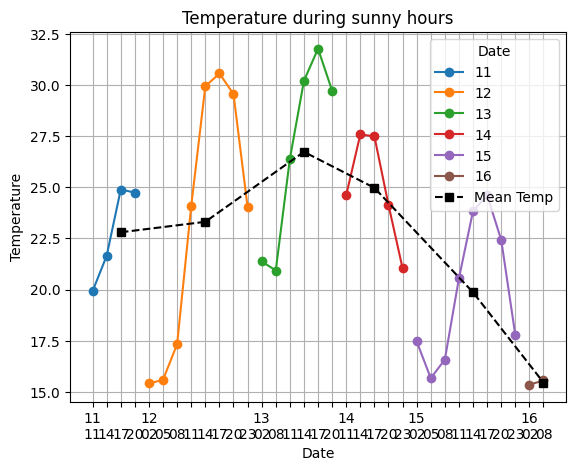

In [1217]:
bt['date'] = bt['h_date'].apply(lambda x: x[:2])
#bt
btgp =bt.groupby('date')
for name, group in btgp:
    #print(name)
    plt.plot(group['h_date'], group['temp'], marker='o', linestyle='-', label=name)
plt.legend(title='Date')
plt.xlabel('Date and Time')
plt.ylabel('Temperature')
plt.title('Temperature during sunny hours')
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.grid()
#plt.show()

# Add a temp mean column in btgp
bt['temp_mean'] = btgp['temp'].transform('mean')

# Plot only the first row of each group
first_rows = btgp.first()
# Plot only the nth row of each group
nth_rows = btgp.nth(2)
# Plot only the middle row of each group
middle_xaxis = btgp.apply(lambda t: t.iloc[len(t)//2])
# choose the row to plot
plotpos = middle_xaxis
plt.plot(plotpos['h_date'], first_rows['temp_mean'], marker='s', linestyle='--', color='black', label='Mean Temp')
plt.legend(title='Date')
plt.xlabel('Date')
plt.ylabel('Temperature')



In [1218]:
btgp.apply(lambda t: t.iloc[len(t)//2])

,h_date,temp,date,temp_mean
date,,,,
11,11/06/2025 17:00:00,24.89,11,22.80000
12,12/06/2025 14:00:00,29.93,12,23.31125
13,13/06/2025 14:00:00,30.20,13,26.73000
14,14/06/2025 17:00:00,27.49,14,24.97200
15,15/06/2025 14:00:00,23.84,15,19.86625
16,16/06/2025 08:00:00,15.56,16,15.45500


In [1219]:
# Add a cumulative mean column in btgp
bt['temp_cummean'] = btgp['temp'].transform(lambda x: x.expanding().mean())
bt[['h_date', 'temp', 'temp_mean', 'temp_cummean']]



,h_date,temp,temp_mean,temp_cummean
0,11/06/2025 11:00:00,19.92,22.80000,19.920000
1,11/06/2025 14:00:00,21.65,22.80000,20.785000
2,11/06/2025 17:00:00,24.89,22.80000,22.153333
3,11/06/2025 20:00:00,24.74,22.80000,22.800000
5,12/06/2025 02:00:00,15.41,23.31125,15.410000
...,...,...,...,...
34,15/06/2025 17:00:00,24.61,19.86625,19.786667
35,15/06/2025 20:00:00,22.43,19.86625,20.164286
36,15/06/2025 23:00:00,17.78,19.86625,19.866250
37,16/06/2025 02:00:00,15.35,15.45500,15.350000


Text(0, 0.5, 'Temperature')

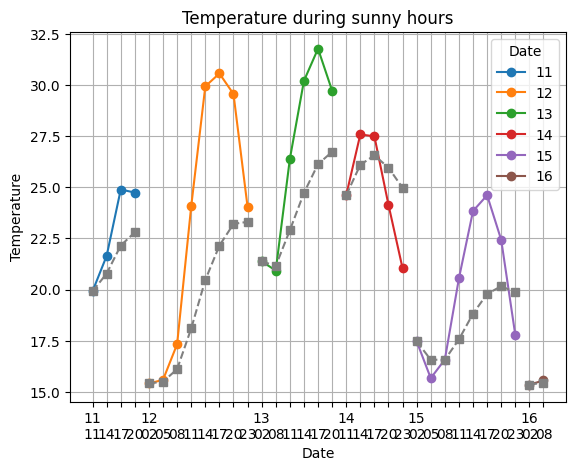

In [1220]:
bt['date'] = bt['h_date'].apply(lambda x: x[:2])
#bt
btgp =bt.groupby('date')
for name, group in btgp:
    plt.plot(group['h_date'], group['temp'], marker='o', linestyle='-', label=name)
plt.legend(title='Date')
plt.xlabel('Date and Time')
plt.ylabel('Temperature')
plt.title('Temperature during sunny hours')
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.grid()
#plt.show()
for name, group in btgp:   
    plt.plot(group['h_date'], group['temp_cummean'], marker='s', linestyle='--', color='grey')
#plt.plot(marker='s', linestyle='--', color='black', label='Cumul Mean Temp')
plt.legend(title='Date')
plt.xlabel('Date')
plt.ylabel('Temperature')


# test chatgpt

In [1221]:
import random
random.randint(-5,5)

3

In [1222]:
import pandas as pd
import matplotlib.pyplot as plt
import random

start = random.randint(8, 22)
end = random.randint(start+1, start+8)

# Example DataFrame
data2 = {
    'date': ['2023-10-01'] * 24 + ['2023-10-02'] * 24 + ['2023-10-03'] * 24 + ['2023-10-04'] * 24 + ['2023-10-05'] * 24,
    'hour': list(range(24)) * 5,
    'temperature': [20 + random.randint(-3,5) for i in range(120)],  # Example temperature data
    'rain': [0 if (i>=start and i<=end) else 1 for i in range(24)]*5  # 0 = no rain, 1 = rain
}


In [1223]:

bt2 = pd.DataFrame(data2)
#bt[bt.date=='2023-10-01'][['temperature']].plot()
#bt[bt.date=='2023-10-01']['rain'].plot()
#bt['rain'].plot()
print(start, end)

# Convert 'date' column to datetime
bt2['date'] = pd.to_datetime(bt2['date'])

# Combine 'date' and 'hour' into a single datetime column
bt2['datetime'] = bt2['date'] + pd.to_timedelta(bt2['hour'], unit='h')

# Filter rows where there is no rain (sunshine hours)
sunshine_data = bt2[bt2['rain'] == 0]

# Group by date
sunshine_groups = sunshine_data.groupby('date')
sunshine_data[sunshine_data['date']=='2023-10-01'].head(10)


8 10


,date,hour,temperature,rain,datetime
8,2023-10-01,8,21,0,2023-10-01 08:00:00
9,2023-10-01,9,22,0,2023-10-01 09:00:00
10,2023-10-01,10,20,0,2023-10-01 10:00:00


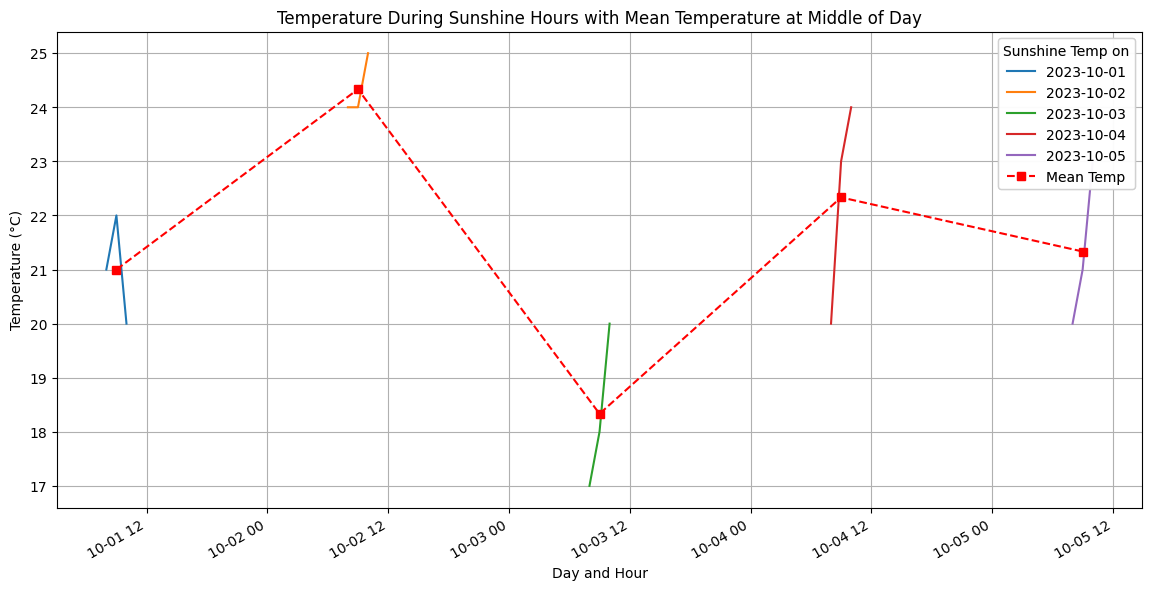

(8, 10)

In [1224]:


# Create a plot
plt.figure(figsize=(14, 7))

# Iterate through each group (day)
mean_data = []
pos_data = []

for date, group in sunshine_groups:
    # Plot temperature for sunshine hours
    plt.plot(group['datetime'], group['temperature'], label=f'{date.date()}')
    #plt.xticks(ticks=range(len(group)))
    # Calculate mean temperature for the day
    mean_temp = group['temperature'].mean()
    mean_data.append(mean_temp)
    
    # Find the middle datetime of the day
    middle_datetime = group['datetime'].iloc[len(group)//2]
    pos_data.append(middle_datetime)
    

# Plot the mean temperature at the middle datetime
plt.plot(pos_data, mean_data, color='red', marker='s', linestyle='--', label=f'Mean Temp')


# Add a title for the temperature lines in the legend
legend1 = plt.legend(title="Sunshine Temp on", loc="upper right")
# Add the first legend back to the plot
plt.gca().add_artist(legend1)
# Add labels and legend
plt.xlabel('Day and Hour')
plt.ylabel('Temperature (°C)')
plt.title('Temperature During Sunshine Hours with Mean Temperature at Middle of Day')
# Add a separate legend for the mean temperature
#plt.legend()
plt.grid(True)

# Format x-axis to show both date and hour
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.show()
start, end, #sunshine_groups.head(3)

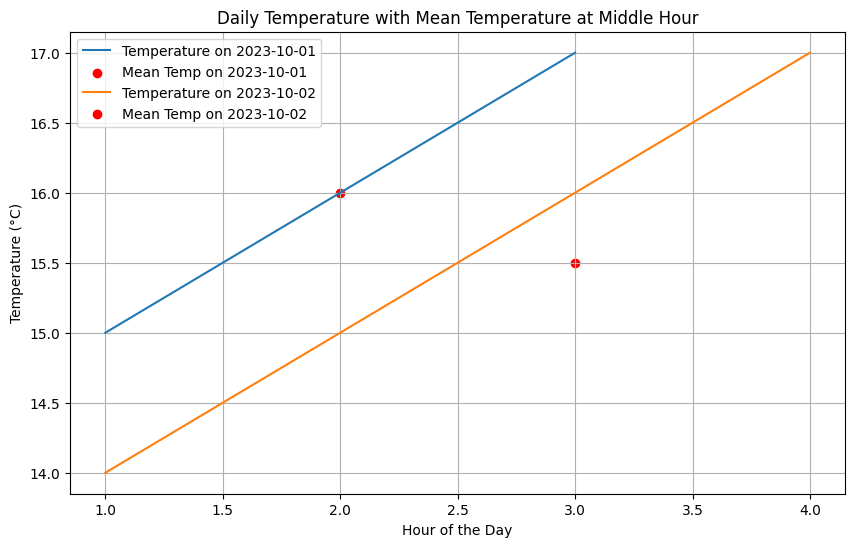

In [1225]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data3 = {
    'date': ['2023-10-01', '2023-10-01', '2023-10-01', '2023-10-02', '2023-10-02', '2023-10-02', '2023-10-02'],
    'hour': [1, 2, 3, 1, 2, 3, 4],
    'temperature': [15, 16, 17, 14, 15, 16, 17]
}
df2 = pd.DataFrame(data3)

# Convert 'date' column to datetime
df2['date'] = pd.to_datetime(df2['date'])

# Group by date
btgp = df2.groupby('date')

# Create a plot
plt.figure(figsize=(10, 6))

# Iterate through each group (day)
for date, group in btgp:
    # Plot temperature for the day
    plt.plot(group['hour'], group['temperature'], label=f'Temperature on {date.date()}')
    
    # Calculate mean temperature for the day
    mean_temp = group['temperature'].mean()
    
    # Find the middle hour of the day
    middle_hour = group['hour'].iloc[len(group)//2]
    
    # Plot the mean temperature at the middle hour
    plt.scatter(middle_hour, mean_temp, color='red', marker='o', label=f'Mean Temp on {date.date()}')

# Add labels and legend
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature with Mean Temperature at Middle Hour')
plt.legend()
plt.grid(True)
plt.show()

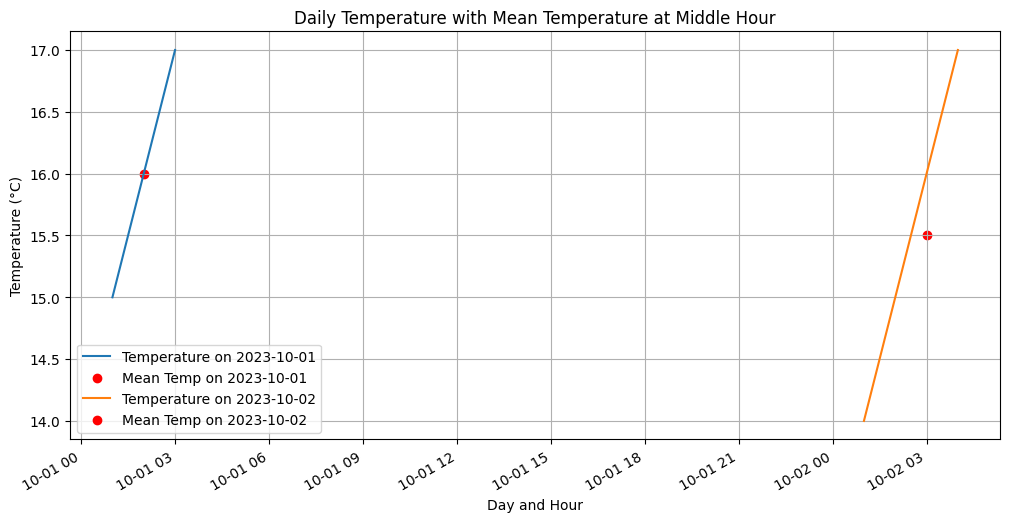

In [1226]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data3 = {
    'date': ['2023-10-01', '2023-10-01', '2023-10-01', '2023-10-02', '2023-10-02', '2023-10-02', '2023-10-02'],
    'hour': [1, 2, 3, 1, 2, 3, 4],
    'temperature': [15, 16, 17, 14, 15, 16, 17]
}
df3 = pd.DataFrame(data3)

# Convert 'date' column to datetime
df3['date'] = pd.to_datetime(df3['date'])

# Combine 'date' and 'hour' into a single datetime column
df3['datetime'] = df3['date'] + pd.to_timedelta(df3['hour'], unit='h')

# Group by date
btgp = df3.groupby('date')

# Create a plot
plt.figure(figsize=(12, 6))

# Iterate through each group (day)
for date, group in btgp:
    # Plot temperature for the day
    plt.plot(group['datetime'], group['temperature'], label=f'Temperature on {date.date()}')
    
    # Calculate mean temperature for the day
    mean_temp = group['temperature'].mean()
    
    # Find the middle datetime of the day
    middle_datetime = group['datetime'].iloc[len(group)//2]
    
    # Plot the mean temperature at the middle datetime
    plt.scatter(middle_datetime, mean_temp, color='red', marker='o', label=f'Mean Temp on {date.date()}')

# Add labels and legend
plt.xlabel('Day and Hour')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature with Mean Temperature at Middle Hour')
plt.legend()
plt.grid(True)

# Format x-axis to show both date and hour
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.show()

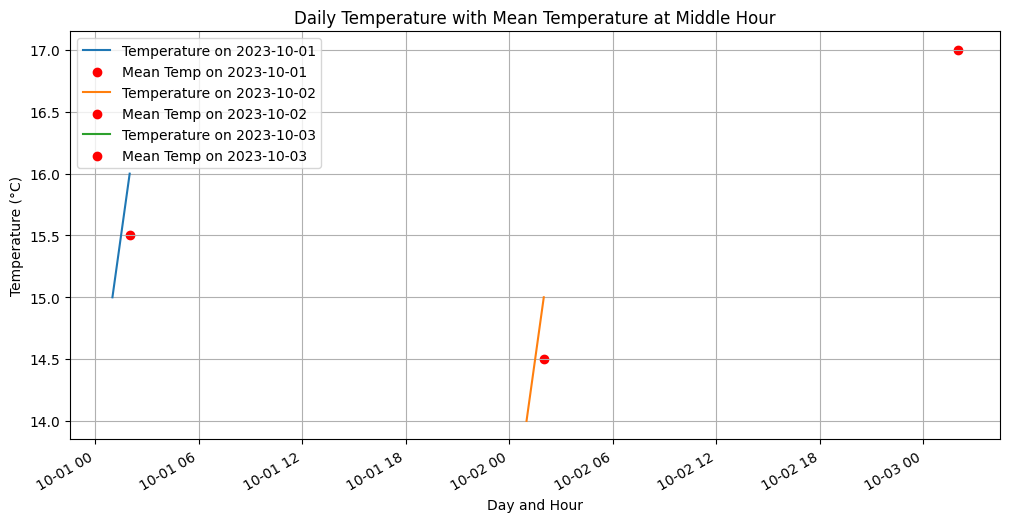

In [1227]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with some missing temperature values
data = {
    'date': ['2023-10-01', '2023-10-01', '2023-10-01', '2023-10-02', '2023-10-02', '2023-10-02', '2023-10-03'],
    'hour': [1, 2, 3, 1, 2, 4, 2],  # Note: Hour 3 is missing for 2023-10-02
    'temperature': [15, 16, None, 14, 15, None, 17]  # None represents missing temperature
}
df = pd.DataFrame(data)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Combine 'date' and 'hour' into a single datetime column
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

# Drop rows where temperature is missing
df = df.dropna(subset=['temperature'])

# Group by date
btgp = df.groupby('date')

# Create a plot
plt.figure(figsize=(12, 6))

# Iterate through each group (day)
for date, group in btgp:
    # Plot temperature for the day
    plt.plot(group['datetime'], group['temperature'], label=f'Temperature on {date.date()}')
    
    # Calculate mean temperature for the day
    mean_temp = group['temperature'].mean()
    
    # Find the middle datetime of the day
    middle_datetime = group['datetime'].iloc[len(group)//2]
    
    # Plot the mean temperature at the middle datetime
    plt.scatter(middle_datetime, mean_temp, color='red', marker='o', label=f'Mean Temp on {date.date()}')

# Add labels and legend
plt.xlabel('Day and Hour')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature with Mean Temperature at Middle Hour')
plt.legend()
plt.grid(True)

# Format x-axis to show both date and hour
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.show()

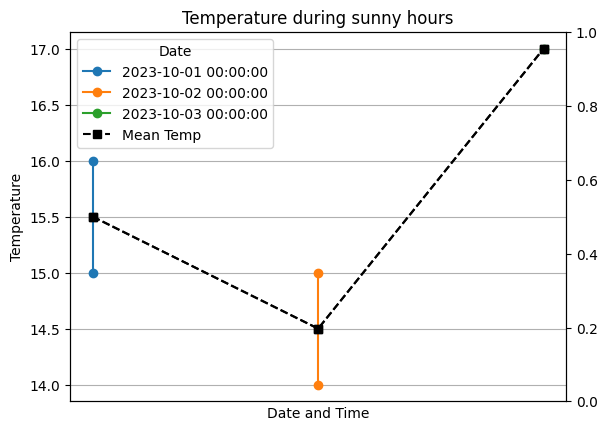

In [1228]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for name, group in btgp:
    ax1.plot(group['date'], group['temperature'], marker='o', linestyle='-', label=name)

mean_temp = btgp['temperature'].mean()
ax1.plot(mean_temp.index, mean_temp.values, marker='s', linestyle='--', color='black', label='Mean Temp')

ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature during sunny hours')
ax1.legend(title='Date')
ax1.grid()



plt.xticks(ticks=range(len(d2)), labels=d2)
ax1.plot(mean_temp.index, mean_temp.values, marker='s', linestyle='--', color='black', label='Mean Temp')
plt.show()


In [1229]:
# first 24 h
current[:8][['h_date','temp','depression','tendances']]

,h_date,temp,depression,tendances
0,11/06/2025 11:00:00,19.92,5.862580,beau temps
1,11/06/2025 14:00:00,21.65,7.111966,beau temps
2,11/06/2025 17:00:00,24.89,9.672062,beau temps
3,11/06/2025 20:00:00,24.74,8.831832,beau temps
4,11/06/2025 23:00:00,19.56,3.547939,pluie
5,12/06/2025 02:00:00,15.41,5.446560,beau temps
6,12/06/2025 05:00:00,15.59,5.669332,beau temps
7,12/06/2025 08:00:00,17.33,6.191078,beau temps


In [1230]:
# next 4 days 
for i in range(1,5):
    print(current[8*i:8*(i+1)][['h_date','temp','depression','tendances']])

                 h_date   temp  depression   tendances
8   12/06/2025 11:00:00  24.07    9.333459  beau temps
9   12/06/2025 14:00:00  29.93   14.702093  beau temps
10  12/06/2025 17:00:00  30.56   14.769482  beau temps
11  12/06/2025 20:00:00  29.56   12.861301  beau temps
12  12/06/2025 23:00:00  24.04    6.755379  beau temps
13  13/06/2025 02:00:00  21.38    4.410938  beau temps
14  13/06/2025 05:00:00  19.39    2.776916       pluie
15  13/06/2025 08:00:00  20.93    4.395759  beau temps
                 h_date   temp  depression   tendances
16  13/06/2025 11:00:00  26.38    9.780093  beau temps
17  13/06/2025 14:00:00  30.20   12.921483  beau temps
18  13/06/2025 17:00:00  31.77   14.145196  beau temps
19  13/06/2025 20:00:00  29.72    9.446599  beau temps
20  13/06/2025 23:00:00  19.53    1.864721       pluie
21  14/06/2025 02:00:00  19.37    2.965001       pluie
22  14/06/2025 05:00:00  18.94    3.145034       pluie
23  14/06/2025 08:00:00  19.63    2.226985       pluie
          

In [1231]:
t = list("1234546")
t

sum((int(n)) for n in list(t))

25